## A Data Science Project on Cancer Prediction

**Table of Content**
* Part 1: DEA & Visualization
* Part 2.1: Machine Learning Model: Lasso Regression
* Part 2.2: Machine Learning Model: Ridge Regression
* Part 2.3: Machine Learning Model: Deep Learning
* Part 3: Machine Learning Model: KMeans Clustering
* Part 4: Conclusions & Recommendations

## Part 1: DEA & Visualization

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("global_cancer_patients_2015_2024.csv")
df.head()

Patient_ID  Age  Gender Country_Region  Year  Genetic_Risk  Air_Pollution  \
0  PT0000000   71    Male             UK  2021           6.4            2.8   
1  PT0000001   34    Male          China  2021           1.3            4.5   
2  PT0000002   80    Male       Pakistan  2023           7.4            7.9   
3  PT0000003   40    Male             UK  2015           1.7            2.9   
4  PT0000004   43  Female         Brazil  2017           5.1            2.8   

   Alcohol_Use  Smoking  Obesity_Level Cancer_Type Cancer_Stage  \
0          9.5      0.9            8.7        Lung    Stage III   
1          3.7      3.9            6.3    Leukemia      Stage 0   
2          2.4      4.7            0.1      Breast     Stage II   
3          4.8      3.5            2.7       Colon      Stage I   
4          2.3      6.7            0.5        Skin    Stage III   

   Treatment_Cost_USD  Survival_Years  Target_Severity_Score  
0            62913.44             5.9                   4.92  
1            12573.41             4.7                   4.65  
2             6984.33             7.1                   5.84  
3            67446.25             1.6                   3.12  
4            77977.12             2.9                   3.62

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

In [4]:
df.describe()

Age          Year  Genetic_Risk  Air_Pollution   Alcohol_Use  \
count  50000.000000  50000.000000  50000.000000   50000.000000  50000.000000   
mean      54.421540   2019.480520      5.001698       5.010126      5.010880   
std       20.224451      2.871485      2.885773       2.888399      2.888769   
min       20.000000   2015.000000      0.000000       0.000000      0.000000   
25%       37.000000   2017.000000      2.500000       2.500000      2.500000   
50%       54.000000   2019.000000      5.000000       5.000000      5.000000   
75%       72.000000   2022.000000      7.500000       7.500000      7.500000   
max       89.000000   2024.000000     10.000000      10.000000     10.000000   

            Smoking  Obesity_Level  Treatment_Cost_USD  Survival_Years  \
count  50000.000000   50000.000000        50000.000000    50000.000000   
mean       4.989826       4.991176        52467.298239        5.006462   
std        2.881579       2.894504        27363.229379        2.883335   
min        0.000000       0.000000         5000.050000        0.000000   
25%        2.500000       2.500000        28686.225000        2.500000   
50%        5.000000       5.000000        52474.310000        5.000000   
75%        7.500000       7.500000        76232.720000        7.500000   
max       10.000000      10.000000        99999.840000       10.000000   

       Target_Severity_Score  
count           50000.000000  
mean                4.951207  
std                 1.199677  
min                 0.900000  
25%                 4.120000  
50%                 4.950000  
75%                 5.780000  
max                 9.160000

#### Checking features and unique values

In [5]:
for col in df.columns:
    print(f"The column is {col} and {df[col].nunique()}.\n{df[col].unique()}")

The column is Patient_ID and 50000.
['PT0000000' 'PT0000001' 'PT0000002' ... 'PT0049997' 'PT0049998'
 'PT0049999']
The column is Age and 70.
[71 34 80 40 43 22 41 72 21 49 57 83 79 52 77 68 78 61 81 66 70 74 26 58
 37 23 33 28 63 27 54 55 69 25 73 82 53 67 59 45 60 48 64 84 20 30 24 47
 31 42 56 46 62 32 51 85 76 89 75 38 87 36 88 35 39 86 50 44 65 29]
The column is Gender and 3.
['Male' 'Female' 'Other']
The column is Country_Region and 10.
['UK' 'China' 'Pakistan' 'Brazil' 'Germany' 'Canada' 'USA' 'India'
 'Australia' 'Russia']
The column is Year and 10.
[2021 2023 2015 2017 2018 2022 2016 2024 2020 2019]
The column is Genetic_Risk and 101.
[ 6.4  1.3  7.4  1.7  5.1  9.5  6.   4.3  8.1  1.9  5.2  3.5  8.5  4.6
  2.3  8.9  5.4  8.4  3.8  9.6  6.9  2.7  1.8  0.5  1.5  8.6  0.6  3.6
  2.8  0.3  5.6  2.   4.8  3.3  7.1  7.6  2.6  9.9  0.9  5.8  6.5  6.1
  4.   7.2  3.4  7.5  1.2  4.1  8.8  4.5  7.3  2.5  5.9  2.9  2.2  7.8
  1.4  9.2  6.7  3.2  6.6  9.   3.   7.7  6.8  0.7  6.3  9.7  9.4

#### Check on null values and duplicated values

In [6]:
print(f"The total null values are {df.isnull().sum().sum()}")

The total null values are 0


In [7]:
print(f"The total duplicated values are {df.duplicated().sum()}")

The total duplicated values are 0


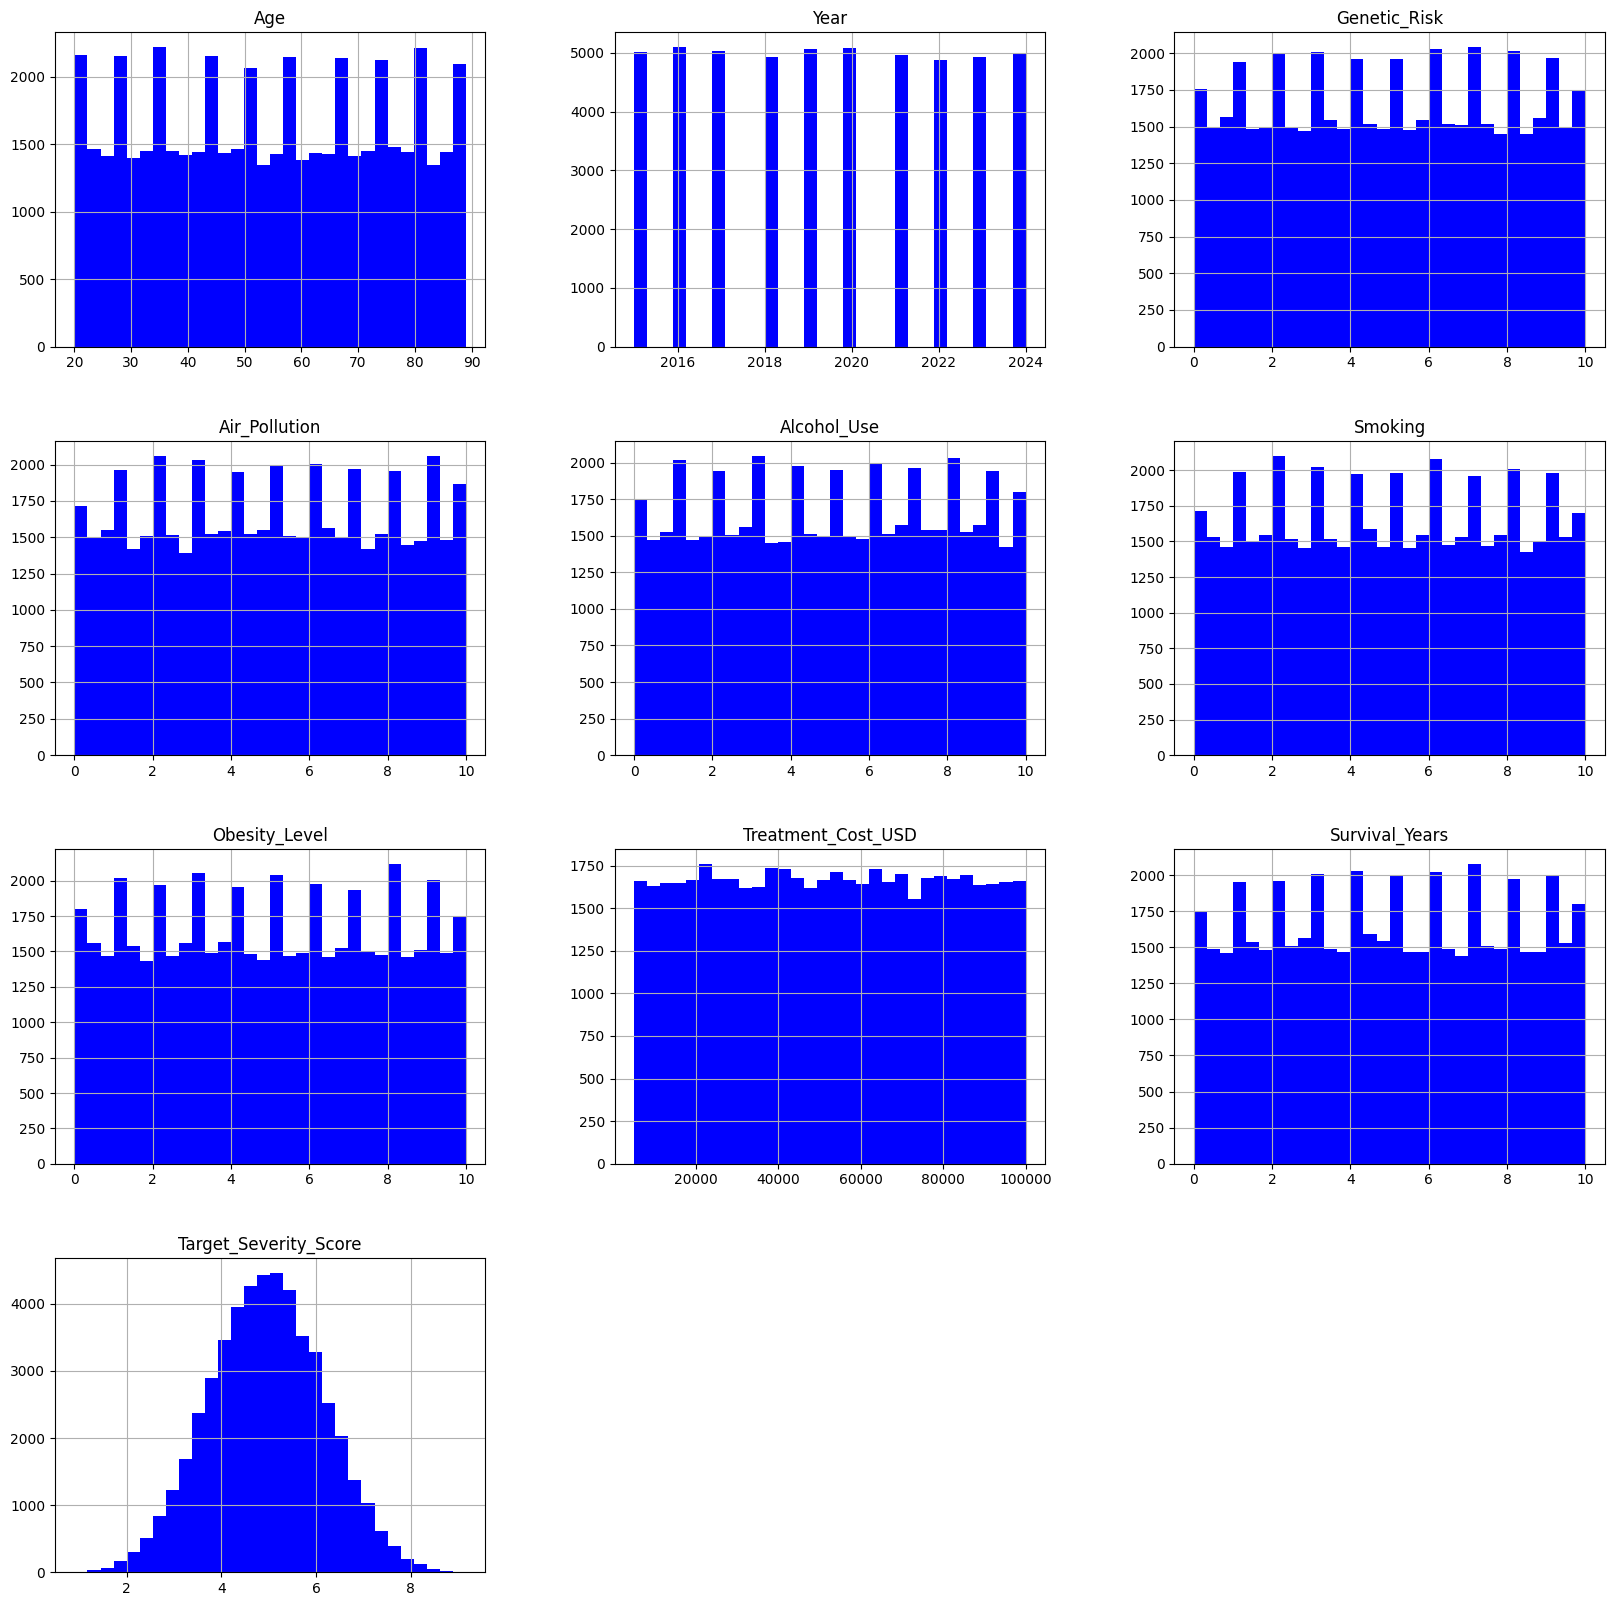

In [8]:
df.hist(bins=30,figsize=(20,20),color="b")
plt.show()

In [9]:
obj_columns=df.drop("Patient_ID",axis=1).select_dtypes("object").columns
obj_columns

Index(['Gender', 'Country_Region', 'Cancer_Type', 'Cancer_Stage'], dtype='object')

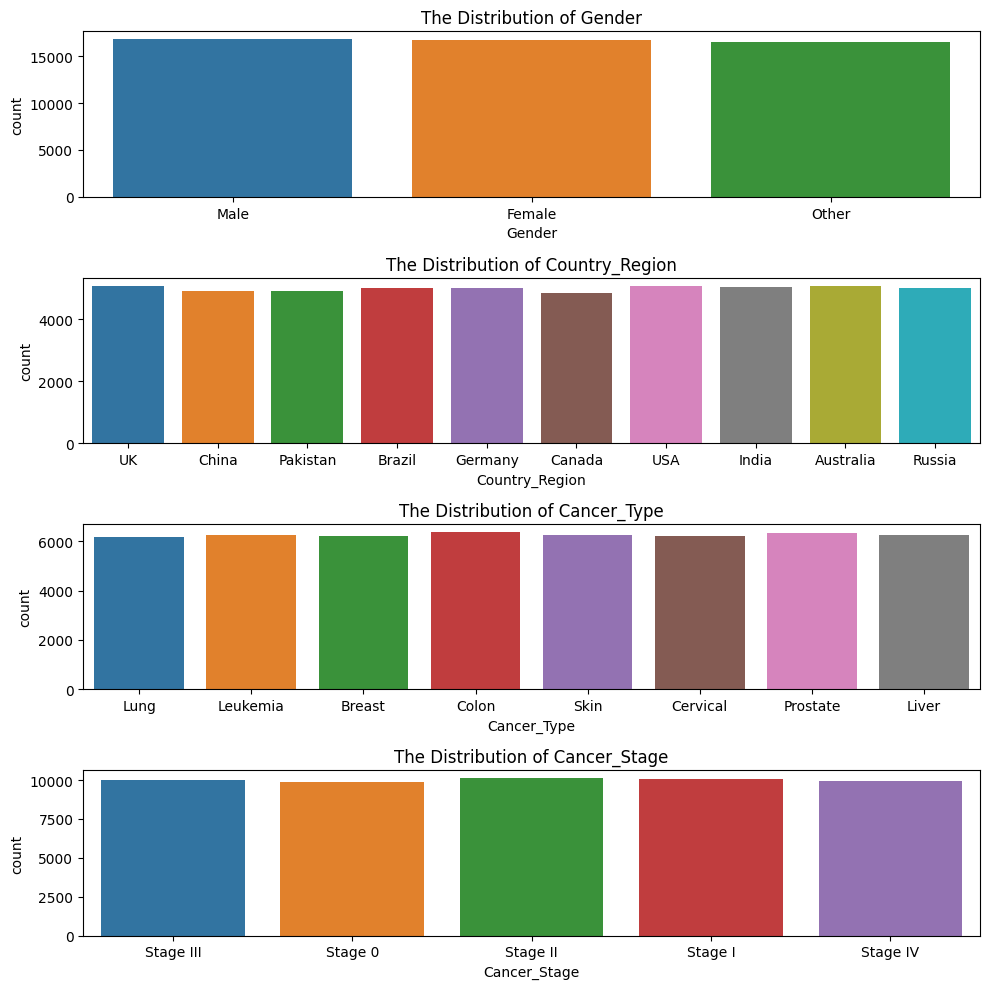

In [10]:
plt.figure(figsize=(10,10))
for i, col in enumerate(obj_columns,1):
    plt.subplot(4,1,i)
    sns.countplot(x=df[col],hue=df[col])
    plt.title(f"The Distribution of {col}")
    plt.tight_layout()
plt.show()    
    

**Observation**
* All the features are evenly distributed
* The target variable target severity score is normally distributed. Few of patients have very light and very severe cancers, whereas majority of patients have very medium level of severity.
* The population of colon cancer is slighly more than other type of cancers.

In [11]:
num_cols=df.select_dtypes("number").columns.tolist()
num_cols

['Age',
 'Year',
 'Genetic_Risk',
 'Air_Pollution',
 'Alcohol_Use',
 'Smoking',
 'Obesity_Level',
 'Treatment_Cost_USD',
 'Survival_Years',
 'Target_Severity_Score']

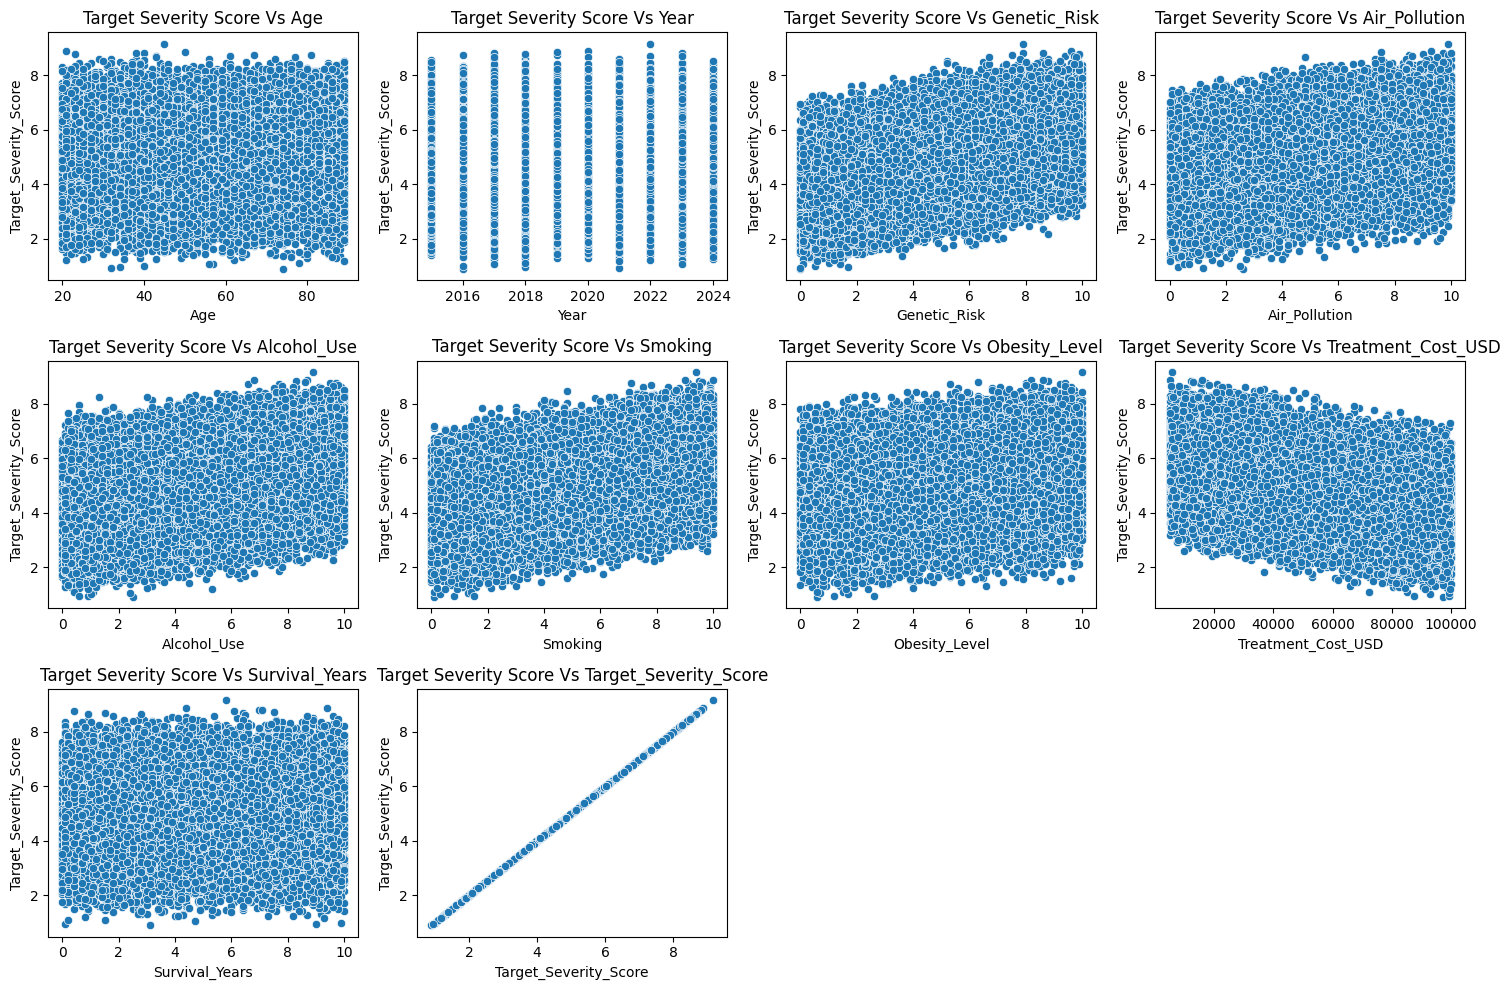

In [12]:
plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols,1):
    plt.subplot(3,4,i)
    sns.scatterplot(data=df,x=col,y="Target_Severity_Score")
    plt.title(f"Target Severity Score Vs {col}")
plt.tight_layout()
plt.show()    
    

**Observation**
* The features that are correlated with target severity scores are Genetic risks, air pollution, alcohol use, smoking, obesity level and treatment cost.
* The more expensive the treatment is, the less severity the cancer is going to be. The cancer treatment is quite pricy.

#### Check on correlations

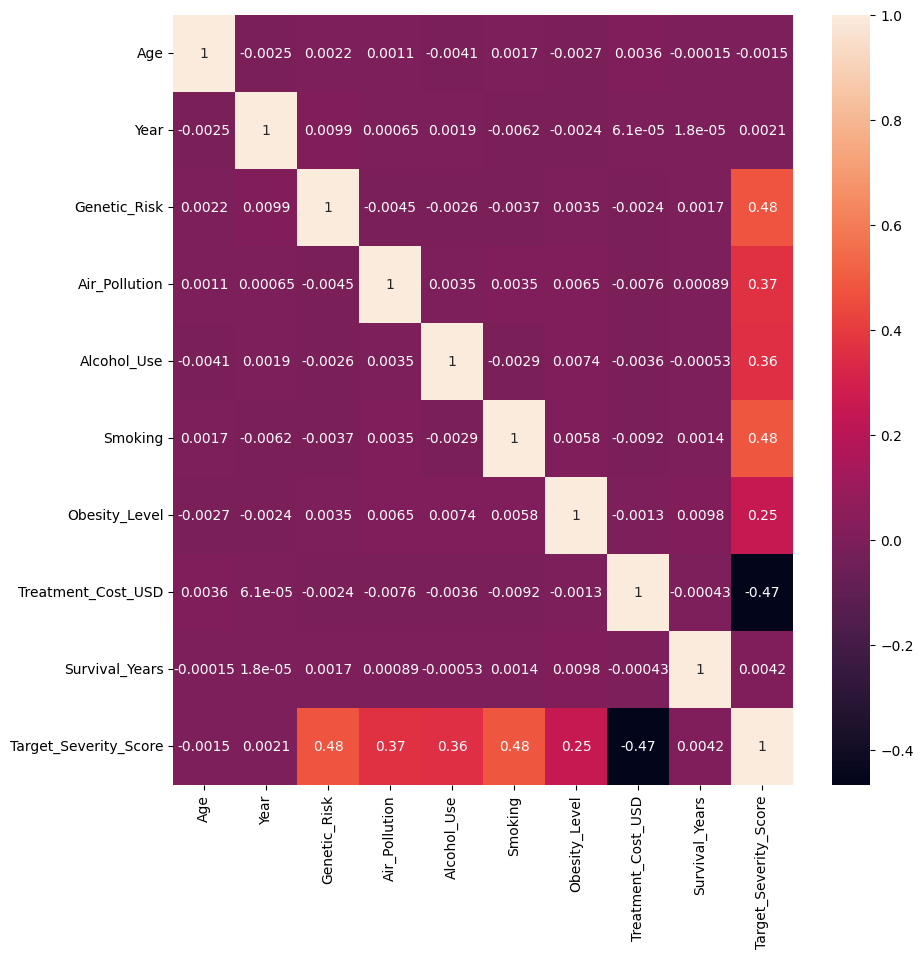

In [13]:
plt.figure(figsize=(10,10))
corr=df[num_cols].corr()
sns.heatmap(corr,annot=True)
plt.show()

**Observation**
* All the features are not correlated with one another.
* However, genetic risk, air pollution, alcohol use, smoking, and treatment cost are all correlated with the target variable.

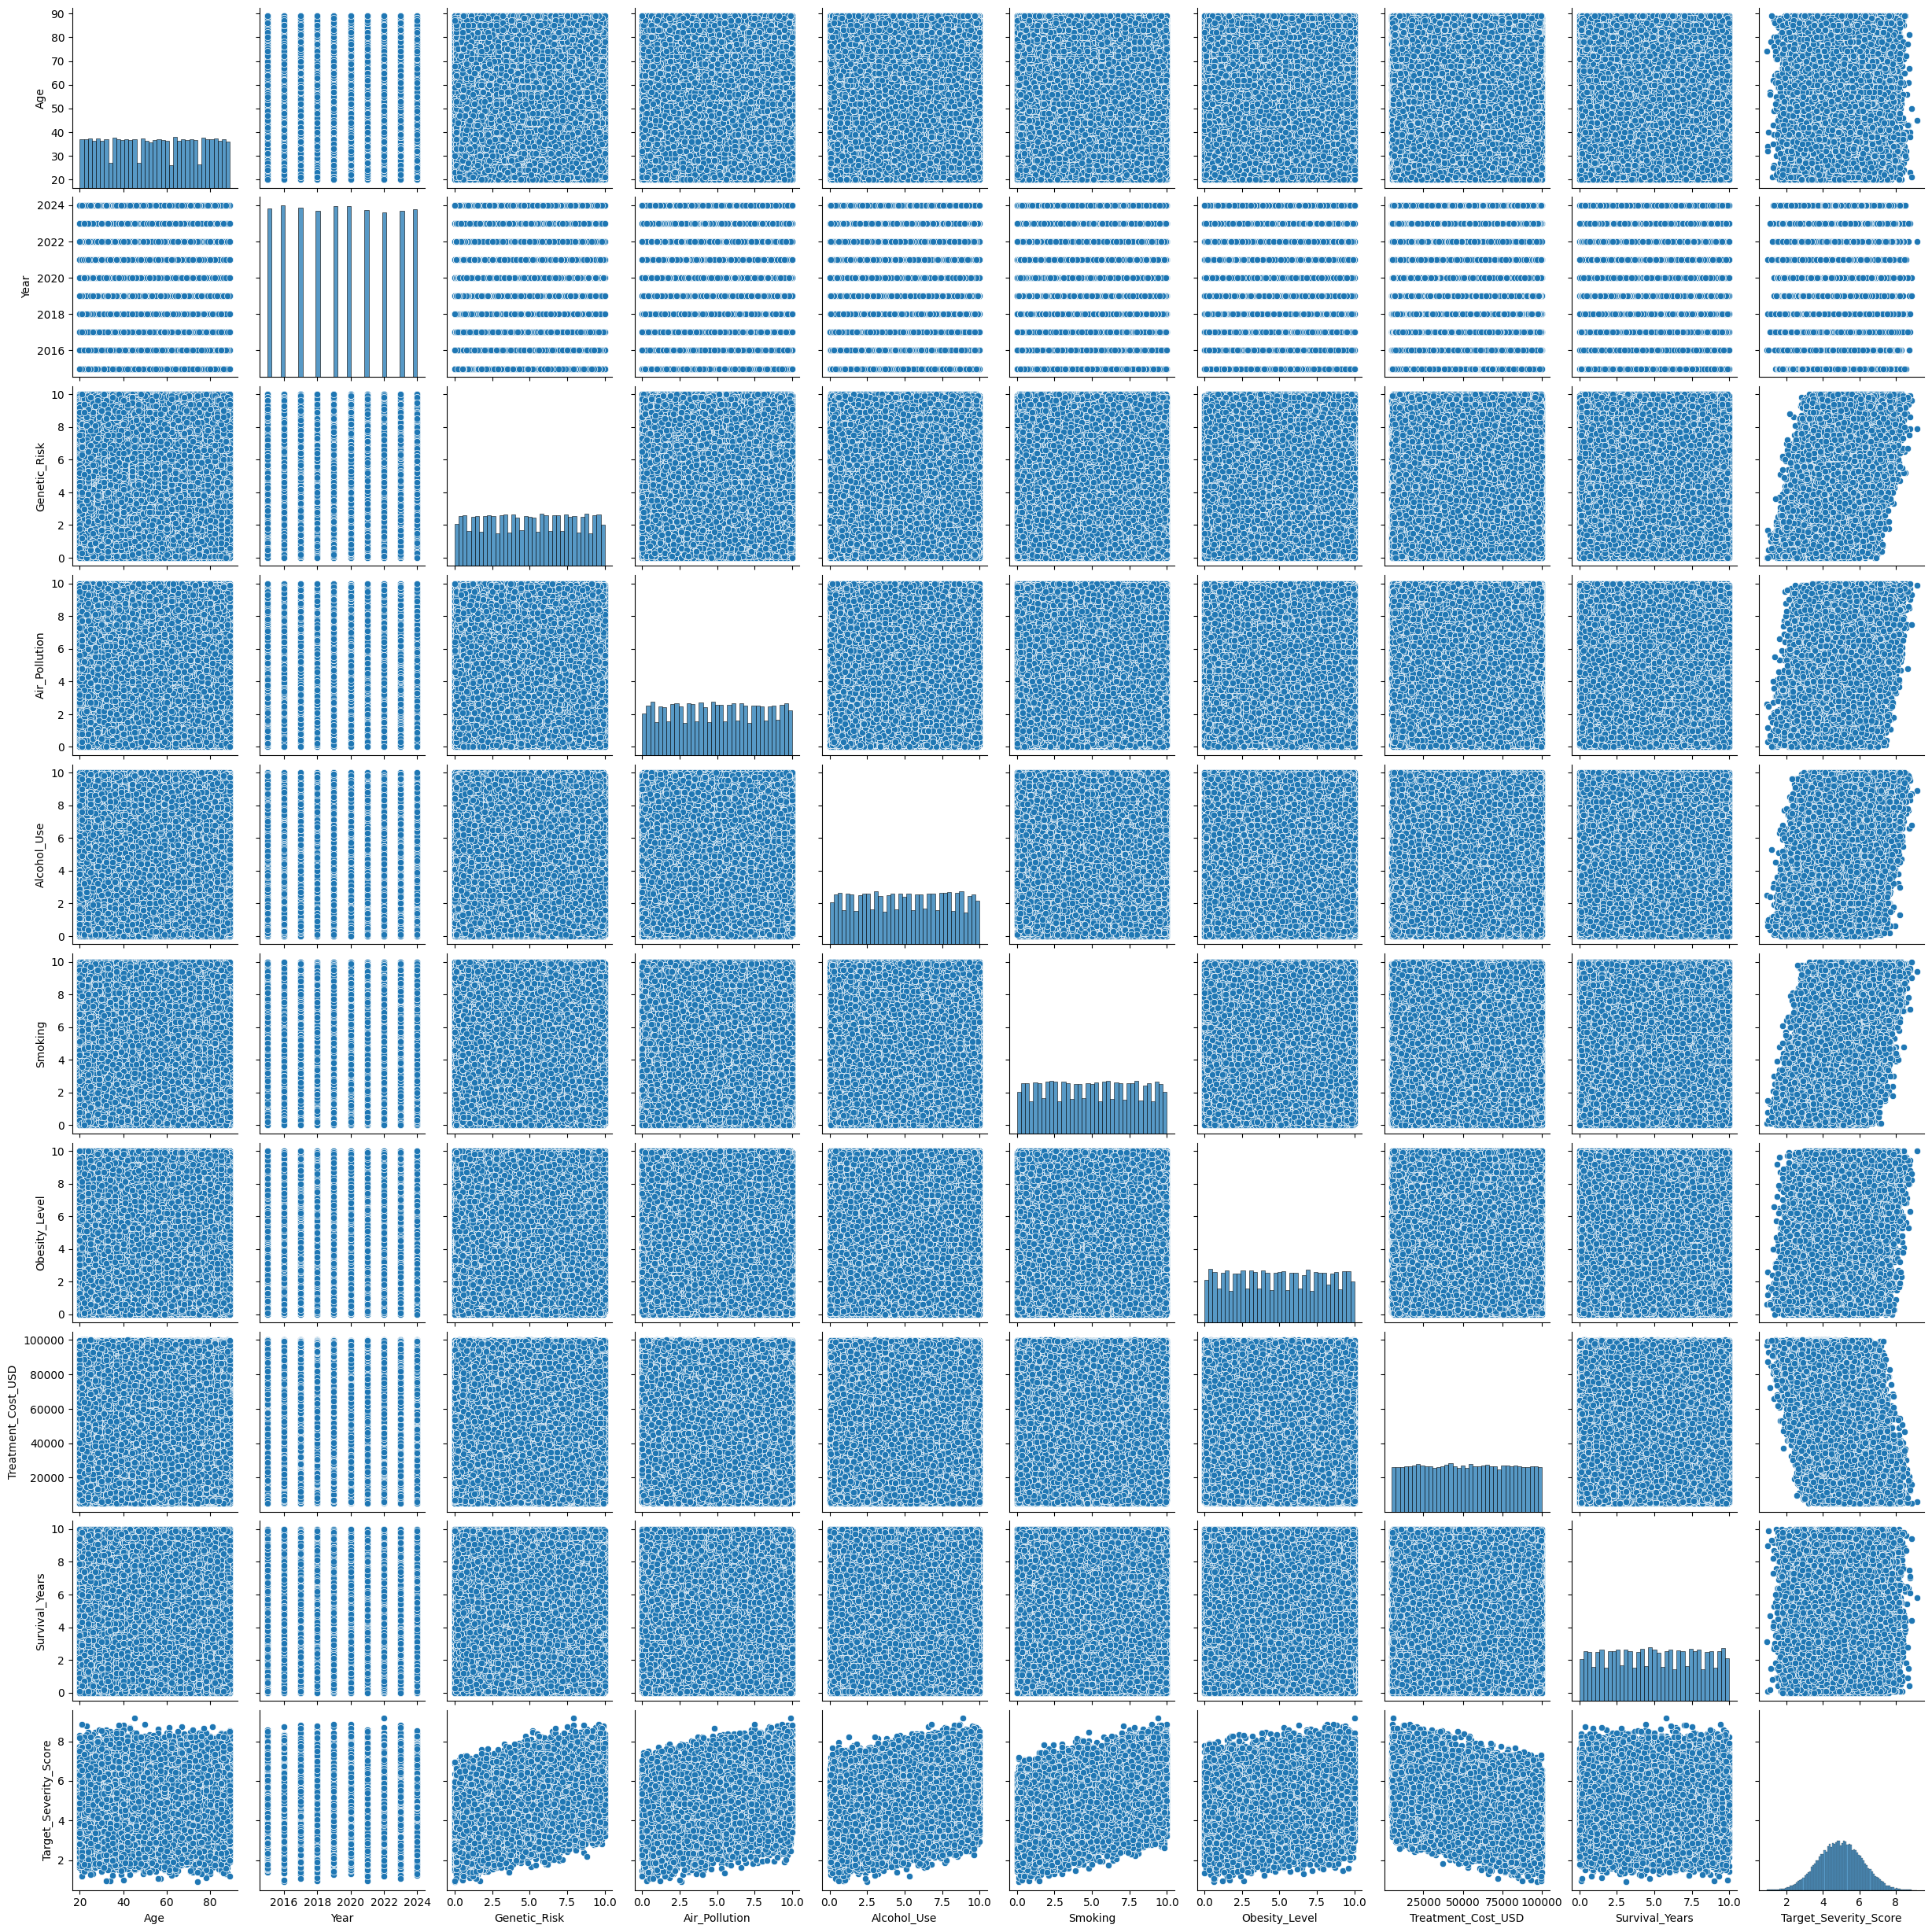

In [14]:
sns.pairplot(df)

In [15]:
df.select_dtypes("number").columns

Index(['Age', 'Year', 'Genetic_Risk', 'Air_Pollution', 'Alcohol_Use',
       'Smoking', 'Obesity_Level', 'Treatment_Cost_USD', 'Survival_Years',
       'Target_Severity_Score'],
      dtype='object')

In [16]:
df.head()

Patient_ID  Age  Gender Country_Region  Year  Genetic_Risk  Air_Pollution  \
0  PT0000000   71    Male             UK  2021           6.4            2.8   
1  PT0000001   34    Male          China  2021           1.3            4.5   
2  PT0000002   80    Male       Pakistan  2023           7.4            7.9   
3  PT0000003   40    Male             UK  2015           1.7            2.9   
4  PT0000004   43  Female         Brazil  2017           5.1            2.8   

   Alcohol_Use  Smoking  Obesity_Level Cancer_Type Cancer_Stage  \
0          9.5      0.9            8.7        Lung    Stage III   
1          3.7      3.9            6.3    Leukemia      Stage 0   
2          2.4      4.7            0.1      Breast     Stage II   
3          4.8      3.5            2.7       Colon      Stage I   
4          2.3      6.7            0.5        Skin    Stage III   

   Treatment_Cost_USD  Survival_Years  Target_Severity_Score  
0            62913.44             5.9                   4.92  
1            12573.41             4.7                   4.65  
2             6984.33             7.1                   5.84  
3            67446.25             1.6                   3.12  
4            77977.12             2.9                   3.62

In [17]:
# Gender vs Alcohol_Use
# Gender Vs Smoking
# Country_Region Vs Air_Pollution
# Country_Region Vs Obesity_Level
# Cancer_Type Vs Genetic_Risk
# Cancer_Stage Vs Obesity_Level
# Cancer_Type Vs Treatment_Cost_USD
# Cancer_Stage Vs Treatment_Cost_USD

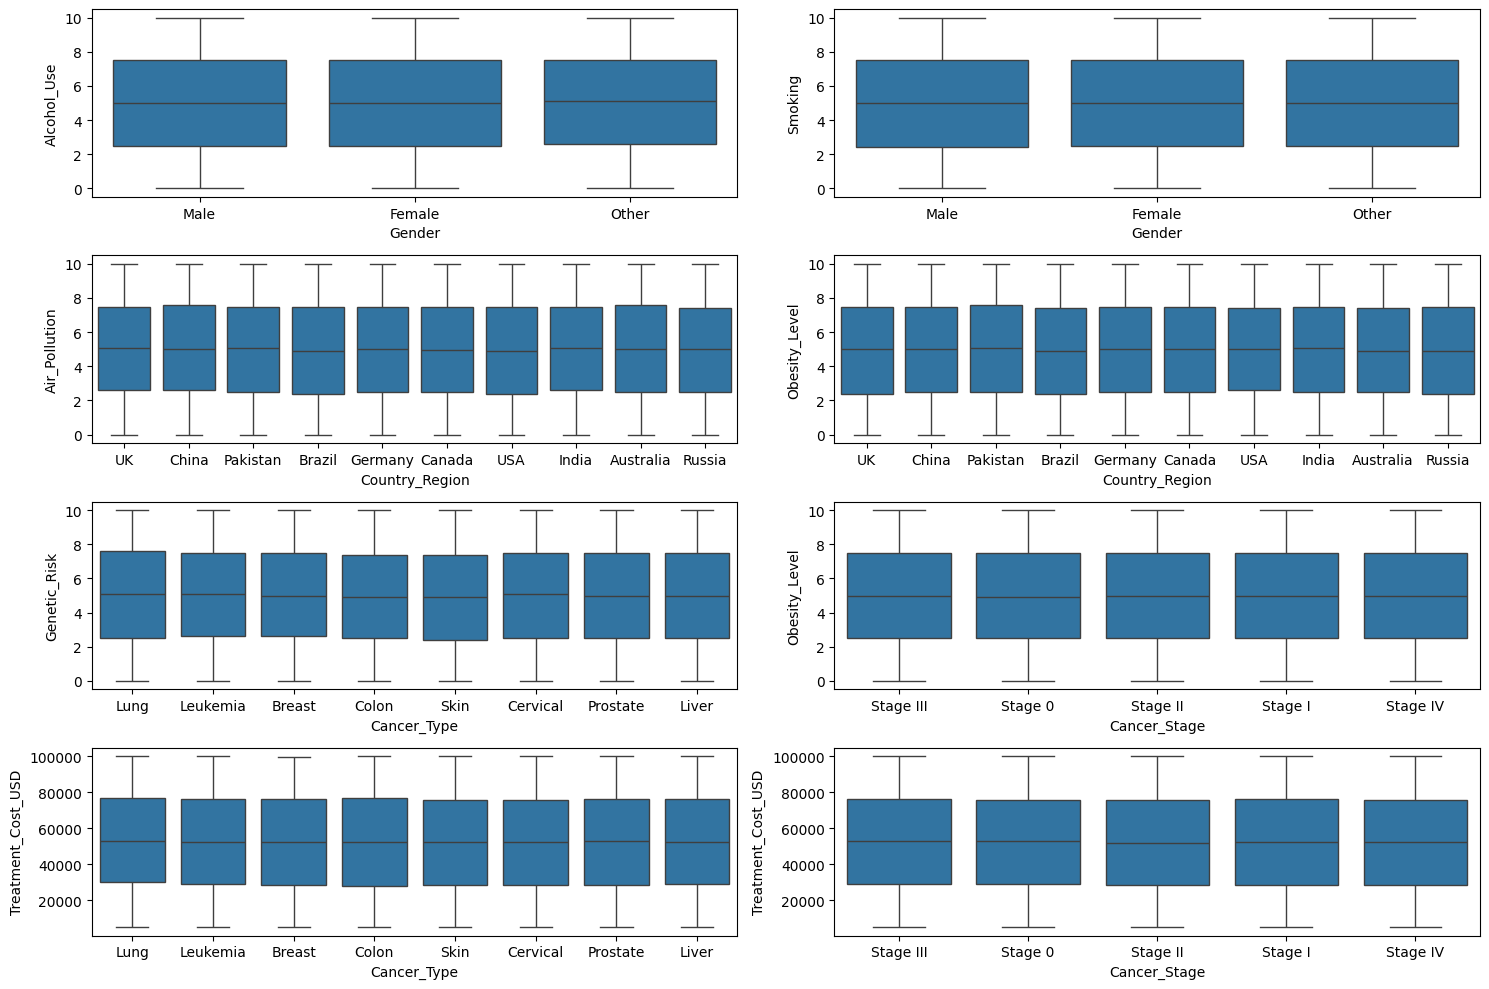

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(4,2,1)
sns.boxplot(data=df,x="Gender",y="Alcohol_Use")
plt.subplot(4,2,2)
sns.boxplot(data=df,x="Gender",y="Smoking")
plt.subplot(4,2,3)
sns.boxplot(data=df,x="Country_Region",y="Air_Pollution")
plt.subplot(4,2,4)
sns.boxplot(data=df,x="Country_Region",y="Obesity_Level")
plt.subplot(4,2,5)
sns.boxplot(data=df,x="Cancer_Type",y="Genetic_Risk")
plt.subplot(4,2,6)
sns.boxplot(data=df,x="Cancer_Stage",y="Obesity_Level")
plt.subplot(4,2,7)
sns.boxplot(data=df,x="Cancer_Type",y="Treatment_Cost_USD")
plt.subplot(4,2,8)
sns.boxplot(data=df,x="Cancer_Stage",y="Treatment_Cost_USD")
plt.tight_layout()
plt.show()

**Observation**
* All the categories for each feature are distributed evenly with one another. 

## Part 2.1 Lasso Regression

In [19]:
X=df.drop(["Patient_ID","Target_Severity_Score","Year"],axis=1)
y=df["Target_Severity_Score"]

In [20]:
obj=X.select_dtypes("object").columns.to_list()

In [21]:
obj

['Gender', 'Country_Region', 'Cancer_Type', 'Cancer_Stage']

In [22]:
obj_dummies=pd.get_dummies(X[obj],drop_first=True).astype("int")
X_dummies=pd.concat([X.drop(obj,axis=1),obj_dummies],axis=1)

In [23]:
X_dummies

Age  Genetic_Risk  Air_Pollution  Alcohol_Use  Smoking  Obesity_Level  \
0       71           6.4            2.8          9.5      0.9            8.7   
1       34           1.3            4.5          3.7      3.9            6.3   
2       80           7.4            7.9          2.4      4.7            0.1   
3       40           1.7            2.9          4.8      3.5            2.7   
4       43           5.1            2.8          2.3      6.7            0.5   
...    ...           ...            ...          ...      ...            ...   
49995   80           2.3            7.5          2.8      3.8            2.9   
49996   40           6.4            3.5          2.9      9.0            9.8   
49997   74           6.2            1.6          8.7      4.7            4.0   
49998   21           4.0            6.5          7.6      8.6            8.1   
49999   22           5.1            9.8          3.2      0.0            0.7   

       Treatment_Cost_USD  Survival_Years  Gender_Male  Gender_Other  ...  \
0                62913.44             5.9            1             0  ...   
1                12573.41             4.7            1             0  ...   
2                 6984.33             7.1            1             0  ...   
3                67446.25             1.6            1             0  ...   
4                77977.12             2.9            0             0  ...   
...                   ...             ...          ...           ...  ...   
49995            71463.70             1.0            1             0  ...   
49996            49619.66             0.4            0             0  ...   
49997             5338.25             2.7            1             0  ...   
49998            45100.47             7.5            1             0  ...   
49999            64023.82             7.4            1             0  ...   

       Cancer_Type_Colon  Cancer_Type_Leukemia  Cancer_Type_Liver  \
0                      0                     0                  0   
1                      0                     1                  0   
2                      0                     0                  0   
3                      1                     0                  0   
4                      0                     0                  0   
...                  ...                   ...                ...   
49995                  0                     1                  0   
49996                  1                     0                  0   
49997                  0                     0                  0   
49998                  0                     0                  1   
49999                  0                     0                  1   

       Cancer_Type_Lung  Cancer_Type_Prostate  Cancer_Type_Skin  \
0                     1                     0                 0   
1                     0                     0                 0   
2                     0                     0                 0   
3                     0                     0                 0   
4                     0                     0                 1   
...                 ...                   ...               ...   
49995                 0                     0                 0   
49996                 0                     0                 0   
49997                 0                     0                 0   
49998                 0                     0                 0   
49999                 0                     0                 0   

       Cancer_Stage_Stage I  Cancer_Stage_Stage II  Cancer_Stage_Stage III  \
0                         0                      0                       1   
1                         0                      0                       0   
2                         0                      1                       0   
3                         1                      0                       0   
4                         0                      0                       1   
...                

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_dummies,y,test_size=0.2,random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test)

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LassoCV
lasso=LassoCV(alphas=10**np.linspace(-3,3,200),cv=5)
lasso.fit(X_train_std,y_train)

LassoCV(alphas=array([1.00000000e-03, 1.07189132e-03, 1.14895100e-03, 1.23155060e-03,
       1.32008840e-03, 1.41499130e-03, 1.51671689e-03, 1.62575567e-03,
       1.74263339e-03, 1.86791360e-03, 2.00220037e-03, 2.14614120e-03,
       2.30043012e-03, 2.46581108e-03, 2.64308149e-03, 2.83309610e-03,
       3.03677112e-03, 3.25508860e-03, 3.48910121e-03, 3.73993730e-03,
       4.00880633e-03, 4.29700470e-0...
       2.02550194e+02, 2.17111795e+02, 2.32720248e+02, 2.49450814e+02,
       2.67384162e+02, 2.86606762e+02, 3.07211300e+02, 3.29297126e+02,
       3.52970730e+02, 3.78346262e+02, 4.05546074e+02, 4.34701316e+02,
       4.65952567e+02, 4.99450512e+02, 5.35356668e+02, 5.73844165e+02,
       6.15098579e+02, 6.59318827e+02, 7.06718127e+02, 7.57525026e+02,
       8.11984499e+02, 8.70359136e+02, 9.32930403e+02, 1.00000000e+03]),
        cv=5)

In [27]:
lasso.alpha_

np.float64(0.001)

In [28]:
def linear_evaluate(X_train,X_test,y_train,y_test, model):
    k_train=X_train.shape[1]
    n_train=X_train.shape[0]
    k_test=X_test.shape[1]
    n_test=X_test.shape[0]
    
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    from sklearn.metrics import mean_absolute_error as MAE, mean_squared_error as MSE, r2_score as r2, root_mean_squared_error as RMSE
    r2_train=r2(y_train,y_train_pred)
    r2_test=r2(y_test,y_test_pred)
    rmse=RMSE(y_test,y_test_pred)
    mse=MSE(y_test,y_test_pred)
    mae=MAE(y_test,y_test_pred)
    adjusted_r2_train=1-(1-r2_train)*(n_train-1)/(n_train-k_train-1)
    adjusted_r2_test=1-(1-r2_test)*(n_test-1)/(n_test-k_test-1)
    print(f"The training r2 Score is {r2_train}, and the testing r2 Score is {r2_test}.")
    print(f"The training adjusted r2 Score is {adjusted_r2_train}, and the testing adjusted r2 Score is {adjusted_r2_test}.")
    print(f"The testing Mean Squared Error is {mse}, and The testing Root Mean Squared Error is {rmse}, and the testing Mean Absolute Error is {mae}. ")

In [29]:
linear_evaluate(X_train_std,X_test_std,y_train,y_test,lasso)

The training r2 Score is 0.9999901618653775, and the testing r2 Score is 0.9999899966288038.
The training adjusted r2 Score is 0.9999901544810537, and the testing adjusted r2 Score is 0.9999899665253696.
The testing Mean Squared Error is 1.4213464665686578e-05, and The testing Root Mean Squared Error is 0.003770074888604546, and the testing Mean Absolute Error is 0.003086002531576598. 


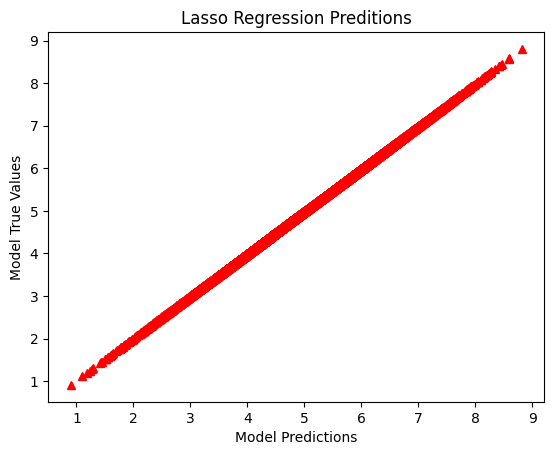

In [30]:
y_test_pred=lasso.predict(X_test_std)
plt.plot(y_test,y_test_pred,"^",color="r")
plt.xlabel("Model Predictions")
plt.ylabel("Model True Values")
plt.title("Lasso Regression Preditions")
plt.show()

## Part 2.2 Ridge Regression

In [31]:
from sklearn.linear_model import RidgeCV
alphas=[0.001,0.01,0.1,1,10,100]
ridge=RidgeCV(alphas=alphas,cv=5)
ridge.fit(X_train_std,y_train)

RidgeCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100], cv=5)

In [32]:
ridge.alpha_

np.float64(0.001)

In [33]:
linear_evaluate(X_train_std,X_test_std,y_train,y_test,ridge)

The training r2 Score is 0.9999942514539498, and the testing r2 Score is 0.9999941376776429.
The training adjusted r2 Score is 0.9999942471391964, and the testing adjusted r2 Score is 0.9999941200359866.
The testing Mean Squared Error is 8.329583102403e-06, and The testing Root Mean Squared Error is 0.0028861017138006413, and the testing Mean Absolute Error is 0.0024959327575404425. 


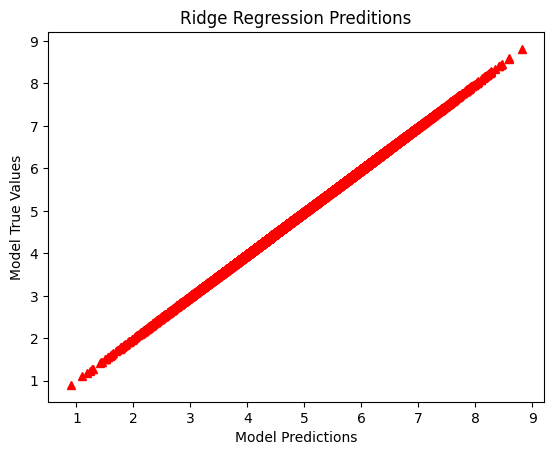

In [34]:
y_test_pred=ridge.predict(X_test_std)
plt.plot(y_test,y_test_pred,"^",color="r")
plt.xlabel("Model Predictions")
plt.ylabel("Model True Values")
plt.title("Ridge Regression Preditions")
plt.show()

## Part 2.3 Deep Learning

In [35]:
input_n=X_train_std.shape[1]

In [36]:
input_n

30

In [37]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
model=Sequential()
model.add(Dense(100,input_dim=input_n,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(1,activation="linear"))

C:\Users\Kun Bi\anaconda3\envs\Data_Science\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         3,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,401 (91.41 KB)

 Trainable params: 23,401 (91.41 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(optimizer="Adam",loss="mean_squared_error")
epoch_hist=model.fit(X_train_std,y_train,epochs=100,batch_size=50,verbose=1,validation_split=0.2)

Epoch 1/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 763us/step - loss: 2.2578 - val_loss: 0.0332
Epoch 2/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - loss: 0.0257 - val_loss: 0.0153
Epoch 3/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - loss: 0.0127 - val_loss: 0.0099
Epoch 4/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - loss: 0.0081 - val_loss: 0.0070
Epoch 5/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - loss: 0.0057 - val_loss: 0.0049
Epoch 6/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - loss: 0.0044 - val_loss: 0.0047
Epoch 7/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - loss: 0.0036 - val_loss: 0.0034
Epoch 8/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - loss: 0.0032 - val_loss: 0.0028
Epoch 9/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - loss: 0.0026 - val_loss: 0.0025
Epoch 10/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - loss: 0.0024 - val_loss: 0.0022
Epoch 11/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss: 0.0023 - val_loss: 0.0014
Epoch 12/100
640/64

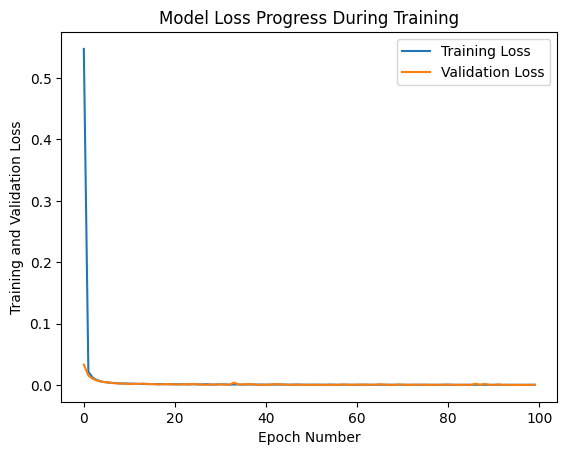

In [40]:
plt.plot(epoch_hist.history["loss"])
plt.plot(epoch_hist.history["val_loss"])
plt.title("Model Loss Progress During Training")
plt.xlabel("Epoch Number")
plt.ylabel("Training and Validation Loss")
plt.legend(["Training Loss","Validation Loss"])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step


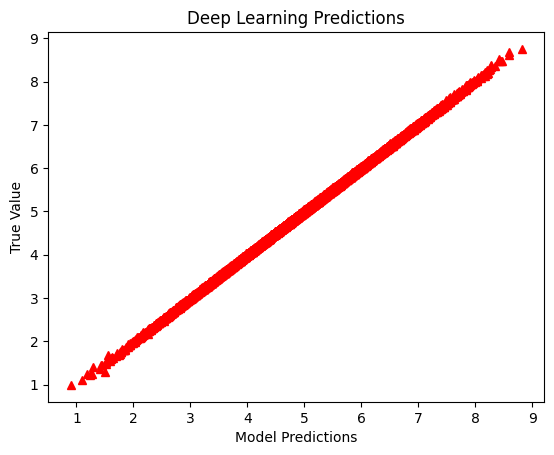

In [41]:
y_predict = model.predict(X_test_std)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel("Model Predictions")
plt.ylabel("True Value")
plt.title('Deep Learning Predictions')
plt.show()

In [42]:
linear_evaluate(X_train_std,X_test_std,y_train,y_test,model)

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 403us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step
The training r2 Score is 0.999686776428502, and the testing r2 Score is 0.9996647525946549.
The training adjusted r2 Score is 0.999686541328621, and the testing adjusted r2 Score is 0.9996637437249428.
The testing Mean Squared Error is 0.0004763421307387502, and The testing Root Mean Squared Error is 0.02182526358921583, and the testing Mean Absolute Error is 0.017541361357212064. 


**Observation on the models**
* All the three models are as highly accurate as 99%.
* The dataset are the most relevant.

## Part 3: KMeans Clustering

In [43]:
cluster_data=df.drop(["Patient_ID","Year","Target_Severity_Score"],axis=1)


In [44]:
obj_cols=cluster_data.select_dtypes("object")
obj_dummies=pd.get_dummies(obj_cols).astype("int")
obj_dummies

Gender_Female  Gender_Male  Gender_Other  Country_Region_Australia  \
0                  0            1             0                         0   
1                  0            1             0                         0   
2                  0            1             0                         0   
3                  0            1             0                         0   
4                  1            0             0                         0   
...              ...          ...           ...                       ...   
49995              0            1             0                         0   
49996              1            0             0                         0   
49997              0            1             0                         0   
49998              0            1             0                         0   
49999              0            1             0                         0   

       Country_Region_Brazil  Country_Region_Canada  Country_Region_China  \
0                          0                      0                     0   
1                          0                      0                     1   
2                          0                      0                     0   
3                          0                      0                     0   
4                          1                      0                     0   
...                      ...                    ...                   ...   
49995                      0                      0                     0   
49996                      0                      0                     0   
49997                      0                      0                     0   
49998                      1                      0                     0   
49999                      0                      0                     0   

       Country_Region_Germany  Country_Region_India  Country_Region_Pakistan  \
0                           0                     0                        0   
1                           0                     0                        0   
2                           0                     0                        1   
3                           0                     0                        0   
4                           0                     0                        0   
...                       ...                   ...                      ...   
49995                       0                     0                        1   
49996                       0                     0                        0   
49997                       0                     0                        1   
49998                       0                     0                        0   
49999                       0                     0                        1   

       ...  Cancer_Type_Leukemia  Cancer_Type_Liver  Cancer_Type_Lung  \
0      ...                     0                  0                 1   
1      ...                     1                  0                 0   
2      ...                     0                  0                 0   
3      ...                     0                  0                 0   
4      ...                     0                  0                 0   
...    ...                   ...                ...               ...   
49995  ...                     1                  0                 0   
49996  ...                     0                  0                 0   
49997  ...                     0                  0                 0   
49998  ...                     0                  1                 0   
49999  ...                     0                  1                 0   

       Cancer_Type_Prostate  Cancer_Type_Skin  Cancer_Stage_Stage 0  \
0                         0                 0                     0   
1                         0                 0                     1   
2                         0                 0                     0   
3                         0        

In [45]:
dummies_data=pd.concat([cluster_data.drop(obj_cols,axis=1),obj_dummies],axis=1)
dummies_data

Age  Genetic_Risk  Air_Pollution  Alcohol_Use  Smoking  Obesity_Level  \
0       71           6.4            2.8          9.5      0.9            8.7   
1       34           1.3            4.5          3.7      3.9            6.3   
2       80           7.4            7.9          2.4      4.7            0.1   
3       40           1.7            2.9          4.8      3.5            2.7   
4       43           5.1            2.8          2.3      6.7            0.5   
...    ...           ...            ...          ...      ...            ...   
49995   80           2.3            7.5          2.8      3.8            2.9   
49996   40           6.4            3.5          2.9      9.0            9.8   
49997   74           6.2            1.6          8.7      4.7            4.0   
49998   21           4.0            6.5          7.6      8.6            8.1   
49999   22           5.1            9.8          3.2      0.0            0.7   

       Treatment_Cost_USD  Survival_Years  Gender_Female  Gender_Male  ...  \
0                62913.44             5.9              0            1  ...   
1                12573.41             4.7              0            1  ...   
2                 6984.33             7.1              0            1  ...   
3                67446.25             1.6              0            1  ...   
4                77977.12             2.9              1            0  ...   
...                   ...             ...            ...          ...  ...   
49995            71463.70             1.0              0            1  ...   
49996            49619.66             0.4              1            0  ...   
49997             5338.25             2.7              0            1  ...   
49998            45100.47             7.5              0            1  ...   
49999            64023.82             7.4              0            1  ...   

       Cancer_Type_Leukemia  Cancer_Type_Liver  Cancer_Type_Lung  \
0                         0                  0                 1   
1                         1                  0                 0   
2                         0                  0                 0   
3                         0                  0                 0   
4                         0                  0                 0   
...                     ...                ...               ...   
49995                     1                  0                 0   
49996                     0                  0                 0   
49997                     0                  0                 0   
49998                     0                  1                 0   
49999                     0                  1                 0   

       Cancer_Type_Prostate  Cancer_Type_Skin  Cancer_Stage_Stage 0  \
0                         0                 0                     0   
1                         0                 0                     1   
2                         0                 0                     0   
3                         0                 0                     0   
4                         0                 1                     0   
...                     ...               ...                   ...   
49995                     0                 0                     1   
49996                     0                 0                     0   
49997                     0                 0                     1   
49998                     0                 0                     0   
49999                     0                 0                     1   

       Cancer_Stage_Stage I  Cancer_Stage_Stage II  Cancer_Stage_Stage III  \
0                         0                      0                       1   
1                         0                      0                       0   
2                         0                      1                       0   
3                         1                      0                       0   
4                         0                      

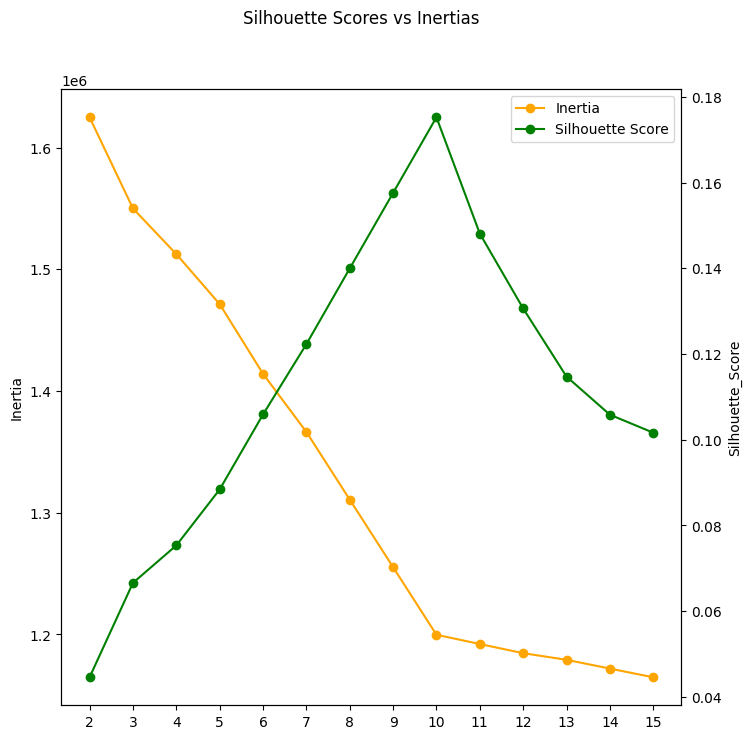

In [46]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_scaled=scaler.fit_transform(dummies_data)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
inertia_lst=[]
score_lst=[]
for i in range(2,16):
    kmeans=KMeans(n_clusters=i,n_init=10,random_state=42)
    kmeans.fit(data_scaled)
    inertia_lst.append(kmeans.inertia_)    
    score_lst.append(silhouette_score(data_scaled,kmeans.labels_))
fig,ax=plt.subplots(figsize=(8,8))
ax.plot(range(2,16),inertia_lst,label="Inertia",c="orange",marker="o")
ax.set_ylabel("Inertia")
ax2=ax.twinx()
ax2.plot(range(2,16), score_lst,label="Silhouette Score",c="green",marker="o")
ax2.set_ylabel("Silhouette_Score")
ax2.set_xticks(np.arange(2,16,1))
fig.suptitle("Silhouette Scores vs Inertias")
fig.legend(bbox_to_anchor=(0.9,0.88))    

**Observation**
* The highest silhouette scores are when clusters are 10,9,11.
* Cluster the datasets with 10,9,11 clusters.

#### k=10

In [47]:
kmeans10=KMeans(n_clusters=10,n_init=10,random_state=42)
kmeans10.fit(data_scaled)

KMeans(n_clusters=10, n_init=10, random_state=42)

In [48]:
cluster_df=pd.DataFrame(kmeans10.cluster_centers_,columns=dummies_data.columns)

In [49]:
from collections import Counter
Counter(kmeans10.labels_)

Counter({np.int32(4): 5092,
         np.int32(1): 5060,
         np.int32(5): 5060,
         np.int32(0): 5040,
         np.int32(9): 5024,
         np.int32(7): 5017,
         np.int32(3): 5004,
         np.int32(6): 4926,
         np.int32(2): 4913,
         np.int32(8): 4864})

#### PCA Visualization

In [50]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(data_scaled)

PCA(n_components=2)

In [51]:
pca.explained_variance_ratio_

array([0.04428805, 0.04404923])

In [52]:
pca_sum=pca.explained_variance_ratio_.sum()
print(f"The total variance that the first two components had covered is {pca_sum}, which is very low.")

The total variance that the first two components had covered is 0.08833727469235597, which is very low.


In [53]:
pca_df=pd.DataFrame(pca.components_,columns=dummies_data.columns)

In [54]:
pca_df

Age  Genetic_Risk  Air_Pollution  Alcohol_Use   Smoking  \
0  0.010293     -0.005243      -0.001485     0.003796 -0.006998   
1  0.011305      0.001734      -0.012669     0.015063  0.001430   

   Obesity_Level  Treatment_Cost_USD  Survival_Years  Gender_Female  \
0      -0.009320            0.015556       -0.010122      -0.658462   
1      -0.001773            0.019953       -0.014264      -0.478565   

   Gender_Male  ...  Cancer_Type_Leukemia  Cancer_Type_Liver  \
0     0.744327  ...             -0.002395           0.001810   
1    -0.329315  ...              0.011469           0.014464   

   Cancer_Type_Lung  Cancer_Type_Prostate  Cancer_Type_Skin  \
0          0.009279              0.004735          0.010264   
1         -0.018997             -0.009560         -0.002358   

   Cancer_Stage_Stage 0  Cancer_Stage_Stage I  Cancer_Stage_Stage II  \
0             -0.030174              0.003948               0.008808   
1              0.000754             -0.000775              -0.007685   

   Cancer_Stage_Stage III  Cancer_Stage_Stage IV  
0                0.011672               0.005584  
1                0.034395              -0.026727  

[2 rows x 34 columns]

**Observation**
* Component 1: Higher =; Lower=
* Component 2: Higher =; Lower=

In [55]:
pca_transformed=pd.DataFrame(pca.transform(data_scaled),columns=["PC1","PC2"])
pca_transformed.head()

PC1       PC2
0  1.674186 -0.653377
1  1.535869 -0.713377
2  1.590708 -0.750473
3  1.661713 -0.671596
4 -1.267992 -0.907101

In [56]:
set(kmeans10.labels_)

{np.int32(0),
 np.int32(1),
 np.int32(2),
 np.int32(3),
 np.int32(4),
 np.int32(5),
 np.int32(6),
 np.int32(7),
 np.int32(8),
 np.int32(9)}

Text(0, 0.5, '<-- Research     Sales -->')

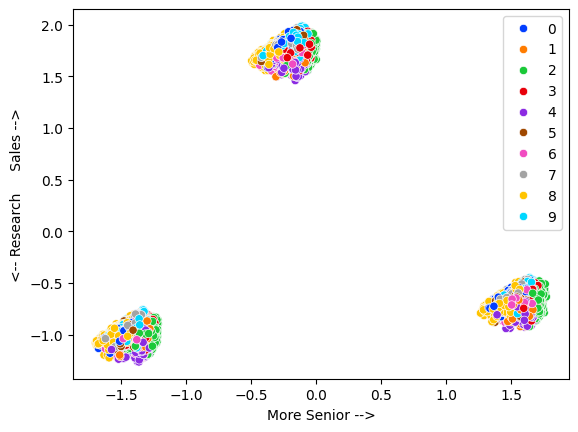

In [57]:
sns.scatterplot(x='PC1', y='PC2', data=pca_transformed,hue=kmeans10.labels_,palette="bright")
plt.xlabel('More Senior -->')
plt.ylabel('<-- Research     Sales -->')

#### Clearly 10 clusters are not the best fit. Reset clusters to 3 as the scatterplot suggested.

In [58]:
kmeans3=KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans3.fit(data_scaled)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [59]:
from collections import Counter
Counter(kmeans3.labels_)

Counter({np.int32(2): 16796, np.int32(0): 16709, np.int32(1): 16495})

<Axes: >

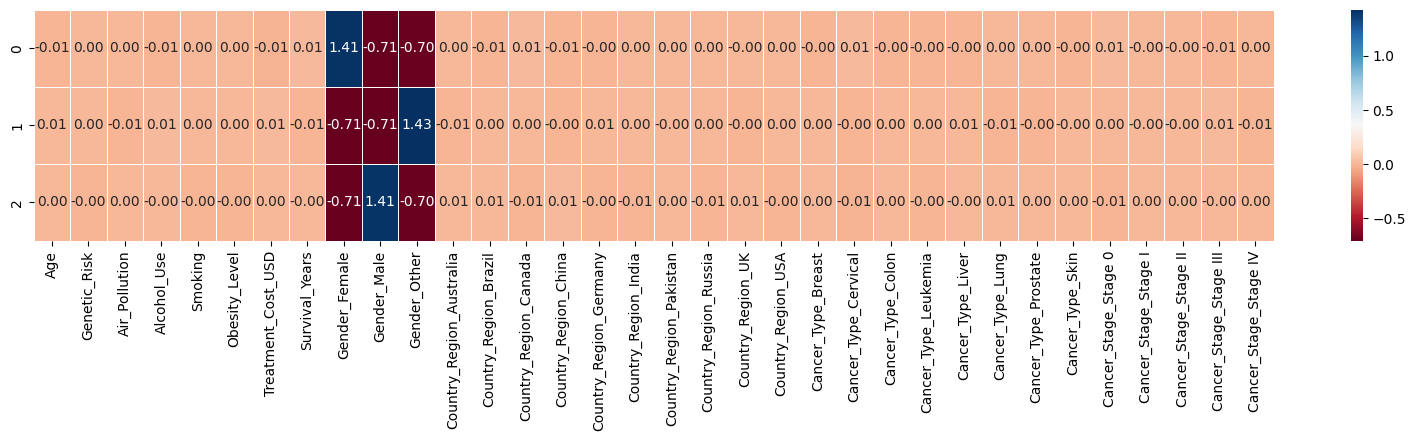

In [60]:
cluster3=pd.DataFrame(kmeans3.cluster_centers_, columns=dummies_data.columns)
plt.figure(figsize=(20,3))
sns.heatmap(cluster3, annot=True, cmap="RdBu", fmt="0.2f", linewidth=0.5)

**Observation**
* Cluster 0: Female.
* Cluster 1: Other.
* Cluster 1: Male.
* The dataset was clustered by genders, and it needs to be retrained.

In [61]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Country_Region', 'Year', 'Genetic_Risk',
       'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level',
       'Cancer_Type', 'Cancer_Stage', 'Treatment_Cost_USD', 'Survival_Years',
       'Target_Severity_Score'],
      dtype='object')

In [62]:
cluster_data=df.drop(["Patient_ID","Year","Target_Severity_Score","Gender","Country_Region"],axis=1)
obj_cols=cluster_data.select_dtypes("object")
obj_dummies=pd.get_dummies(obj_cols).astype("int")
dummies_data2=pd.concat([cluster_data.drop(obj_cols,axis=1),obj_dummies],axis=1)
dummies_data2


Age  Genetic_Risk  Air_Pollution  Alcohol_Use  Smoking  Obesity_Level  \
0       71           6.4            2.8          9.5      0.9            8.7   
1       34           1.3            4.5          3.7      3.9            6.3   
2       80           7.4            7.9          2.4      4.7            0.1   
3       40           1.7            2.9          4.8      3.5            2.7   
4       43           5.1            2.8          2.3      6.7            0.5   
...    ...           ...            ...          ...      ...            ...   
49995   80           2.3            7.5          2.8      3.8            2.9   
49996   40           6.4            3.5          2.9      9.0            9.8   
49997   74           6.2            1.6          8.7      4.7            4.0   
49998   21           4.0            6.5          7.6      8.6            8.1   
49999   22           5.1            9.8          3.2      0.0            0.7   

       Treatment_Cost_USD  Survival_Years  Cancer_Type_Breast  \
0                62913.44             5.9                   0   
1                12573.41             4.7                   0   
2                 6984.33             7.1                   1   
3                67446.25             1.6                   0   
4                77977.12             2.9                   0   
...                   ...             ...                 ...   
49995            71463.70             1.0                   0   
49996            49619.66             0.4                   0   
49997             5338.25             2.7                   1   
49998            45100.47             7.5                   0   
49999            64023.82             7.4                   0   

       Cancer_Type_Cervical  ...  Cancer_Type_Leukemia  Cancer_Type_Liver  \
0                         0  ...                     0                  0   
1                         0  ...                     1                  0   
2                         0  ...                     0                  0   
3                         0  ...                     0                  0   
4                         0  ...                     0                  0   
...                     ...  ...                   ...                ...   
49995                     0  ...                     1                  0   
49996                     0  ...                     0                  0   
49997                     0  ...                     0                  0   
49998                     0  ...                     0                  1   
49999                     0  ...                     0                  1   

       Cancer_Type_Lung  Cancer_Type_Prostate  Cancer_Type_Skin  \
0                     1                     0                 0   
1                     0                     0                 0   
2                     0                     0                 0   
3                     0                     0                 0   
4                     0                     0                 1   
...                 ...                   ...               ...   
49995                 0                     0                 0   
49996                 0                     0                 0   
49997                 0                     0                 0   
49998                 0                     0                 0   
49999                 0                     0                 0   

       Cancer_Stage_Stage 0  Cancer_Stage_Stage I  Cancer_Stage_Stage II  \
0                         0                     0                      0   
1                         1                     0                      0   
2                         0                     0                      1   
3                         0                     1                      0   
4                         0                     0                      0   
...                     ...                   ...                    ...   
499

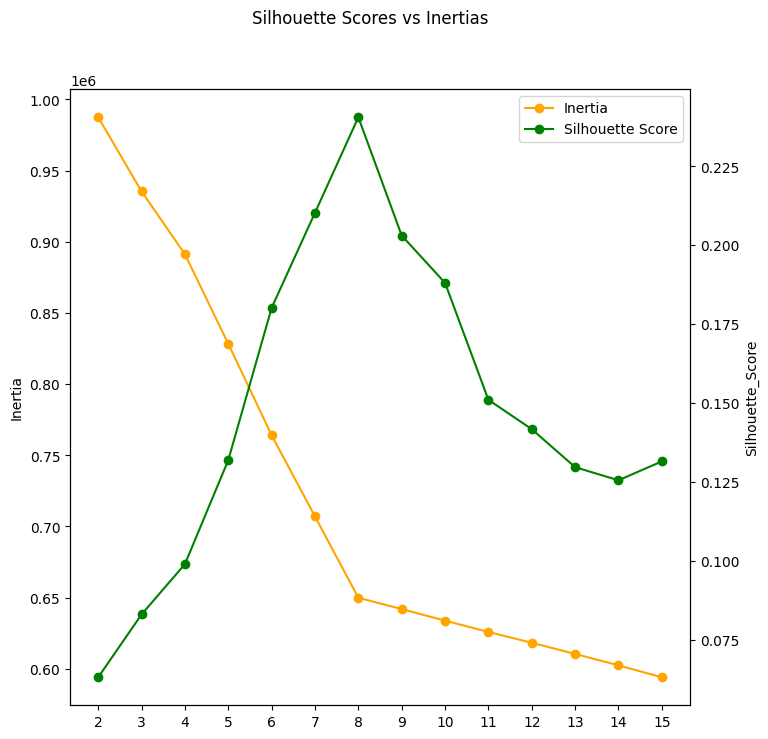

In [63]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_scaled2=scaler.fit_transform(dummies_data2)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
inertia_lst=[]
score_lst=[]
for i in range(2,16):
    kmeans=KMeans(n_clusters=i,n_init=10,random_state=42)
    kmeans.fit(data_scaled2)
    inertia_lst.append(kmeans.inertia_)    
    score_lst.append(silhouette_score(data_scaled2,kmeans.labels_))
fig,ax=plt.subplots(figsize=(8,8))
ax.plot(range(2,16),inertia_lst,label="Inertia",c="orange",marker="o")
ax.set_ylabel("Inertia")
ax2=ax.twinx()
ax2.plot(range(2,16), score_lst,label="Silhouette Score",c="green",marker="o")
ax2.set_ylabel("Silhouette_Score")
ax2.set_xticks(np.arange(2,16,1))
fig.suptitle("Silhouette Scores vs Inertias")
fig.legend(bbox_to_anchor=(0.9,0.88))    

**Observation**
* The cluster point with the highest silhouette score is 8. Therefore, train a 8 cluster KMeans model. 

In [64]:
kmeans8=KMeans(n_clusters=8)
kmeans8.fit(data_scaled2)

KMeans()

In [65]:
from collections import Counter
Counter(kmeans8.labels_)

Counter({np.int32(5): 6376,
         np.int32(3): 6308,
         np.int32(1): 6266,
         np.int32(2): 6249,
         np.int32(4): 6231,
         np.int32(0): 6222,
         np.int32(7): 6189,
         np.int32(6): 6159})

<Axes: >

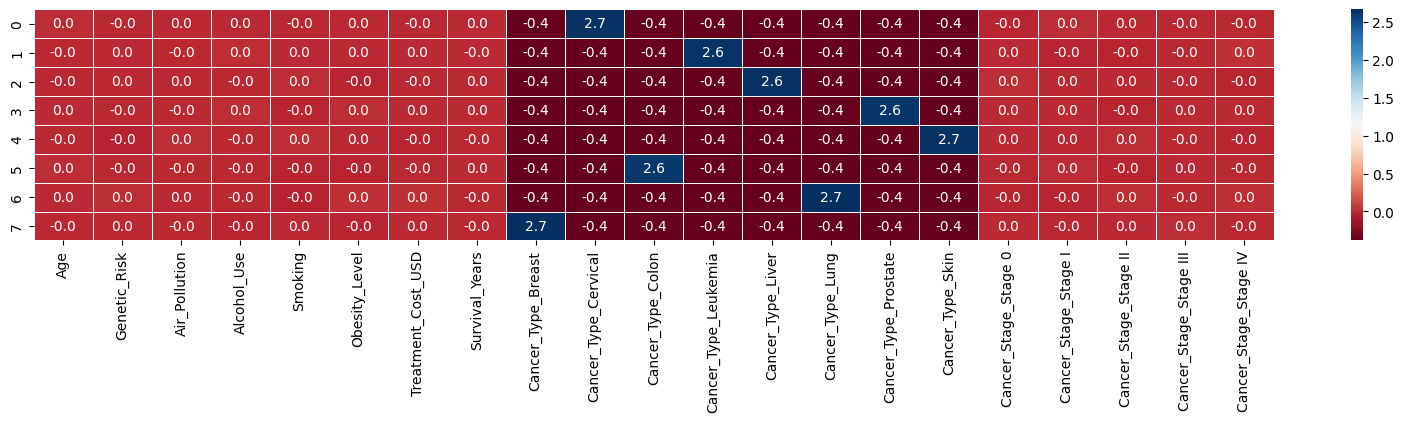

In [66]:
cluster3=pd.DataFrame(kmeans8.cluster_centers_, columns=dummies_data2.columns)
plt.figure(figsize=(20,3))
sns.heatmap(cluster3,annot=True, cmap="RdBu", fmt="0.1f",linewidth=0.5)


**Observation**
* Now the cluster is making a lot more sense since it's clustered based on cancer type.
* Cluster 0: Liver Cancer.
* Cluster 1: Lung Cancer
* Cluster 2: Breast Cancer
* Cluster 3: Cervical Cancer
* Cluster 4: Prostate Cancer
* Cluster 5: Colon Cancer
* Cluster 6: Leukemia Cancer
* Cluster 7: Skin Cancer

In [67]:
df["Cluster_8"]=pd.Series(kmeans8.labels_)
df["Cluster_8_labels"]=df.Cluster_8.map({
    0:"Liver Cancer",
    1:"Lung Cancer",
    2:"Breast Cancer",
    3:"Cervical Cancer",
    4:"Prostate Cancer",
    5:"Colon Cancer",
    6:"Leukemia Cancer",
    7:"Skin Cancer",
})

#### PCA Visualization

In [68]:
from sklearn.decomposition import PCA
pca2=PCA(n_components=2)
pca2.fit(data_scaled2)

PCA(n_components=2)

In [69]:
print(pca.explained_variance_ratio_)
s=pca2.explained_variance_ratio_.sum()
print(f"The total variance covered by the first two pca components is {np.round(s*100,2)}%.")

[0.04428805 0.04404923]
The total variance covered by the first two pca components is 11.96%.


In [70]:
pca_df=pd.DataFrame(pca2.components_,columns=dummies_data2.columns)
pca_df.T

0         1
Age                     0.008886 -0.000423
Genetic_Risk           -0.020919  0.037309
Air_Pollution           0.006782 -0.011222
Alcohol_Use            -0.015622  0.010181
Smoking                 0.044644 -0.010214
Obesity_Level           0.028951 -0.009100
Treatment_Cost_USD     -0.031457 -0.004439
Survival_Years         -0.014431  0.007378
Cancer_Type_Breast      0.035666 -0.009829
Cancer_Type_Cervical    0.006803  0.071864
Cancer_Type_Colon      -0.087427  0.015269
Cancer_Type_Leukemia   -0.019326 -0.104301
Cancer_Type_Liver      -0.000201  0.045285
Cancer_Type_Lung        0.098551 -0.054861
Cancer_Type_Prostate   -0.062304 -0.036629
Cancer_Type_Skin        0.030077  0.073183
Cancer_Stage_Stage 0   -0.107327 -0.136018
Cancer_Stage_Stage I   -0.535084  0.643169
Cancer_Stage_Stage II   0.804061  0.352394
Cancer_Stage_Stage III -0.164259 -0.290315
Cancer_Stage_Stage IV  -0.000586 -0.573894

**Interpret the components**
* Component 1: high=Stage II cancer; low=Stage I and Stage III cancer;
* Component 2: high=Stage I, II cancer; low=Stage 0, III, IV cancer;


In [71]:
scaled_pca2=pd.DataFrame(pca2.transform(data_scaled2),columns=["PC1","PC2"])
scaled_pca2.head()

PC1       PC2
0 -0.186568 -0.848494
1 -0.261310 -0.702703
2  2.111517  0.884709
3 -1.630753  1.615782
4 -0.353778 -0.506485

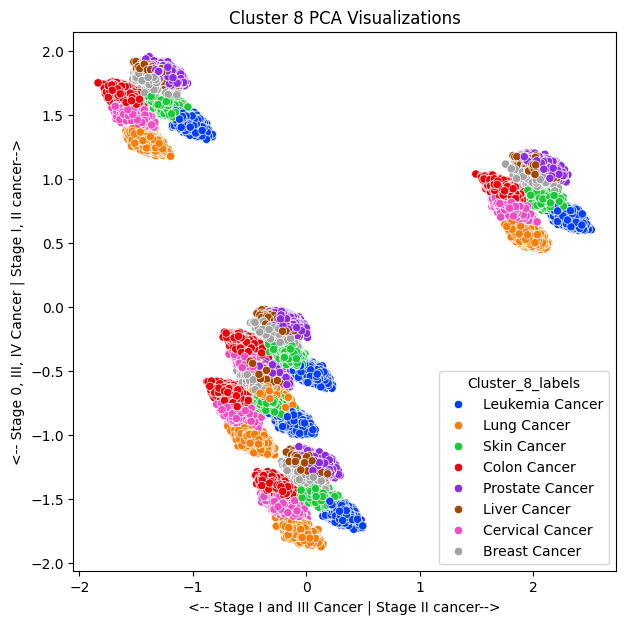

In [72]:
plt.figure(figsize=(7,7))
sns.scatterplot(x="PC1",y="PC2",data=scaled_pca2,hue=df.Cluster_8_labels,palette="bright")
plt.xlabel("<-- Stage I and III Cancer | Stage II cancer-->")
plt.ylabel("<-- Stage 0, III, IV Cancer | Stage I, II cancer-->")
plt.title("Cluster 8 PCA Visualizations")
plt.show()

In [73]:
a=df.groupby(["Cluster_8_labels","Cancer_Stage"]).size().unstack()
a["total"]=a.sum(axis=1)
a

Cancer_Stage      Stage 0  Stage I  Stage II  Stage III  Stage IV  total
Cluster_8_labels                                                        
Breast Cancer        1270     1268      1273       1237      1201   6249
Cervical Cancer      1259     1276      1229       1271      1273   6308
Colon Cancer         1256     1321      1244       1303      1252   6376
Leukemia Cancer      1185     1182      1298       1208      1286   6159
Liver Cancer         1190     1290      1286       1238      1218   6222
Lung Cancer          1255     1222      1227       1251      1311   6266
Prostate Cancer      1243     1275      1294       1230      1189   6231
Skin Cancer          1231     1212      1273       1270      1203   6189

In [74]:
a.columns

Index(['Stage 0', 'Stage I', 'Stage II', 'Stage III', 'Stage IV', 'total'], dtype='object', name='Cancer_Stage')

In [75]:
for col in a.columns.tolist()[:-1]:
    a[f"{col}%"]=a[col]/a["total"]
b=a.iloc[:,6:10]    
b.style.background_gradient(axis=1)

#### Each Cancer type have equal percentage of patients in each cabcer stage

In [76]:
for col in a.columns.tolist()[:-1]:
    a[f"{col}%"]=a[col]/a["total"]
    a[f"{col}%"]=a[f"{col}%"].apply(lambda x:np.round(x*100,2))
b=a.iloc[:,6:10]    
b.style.background_gradient(axis=1)

Text(0.5, 1.0, 'Severity Scores for each Cluster')

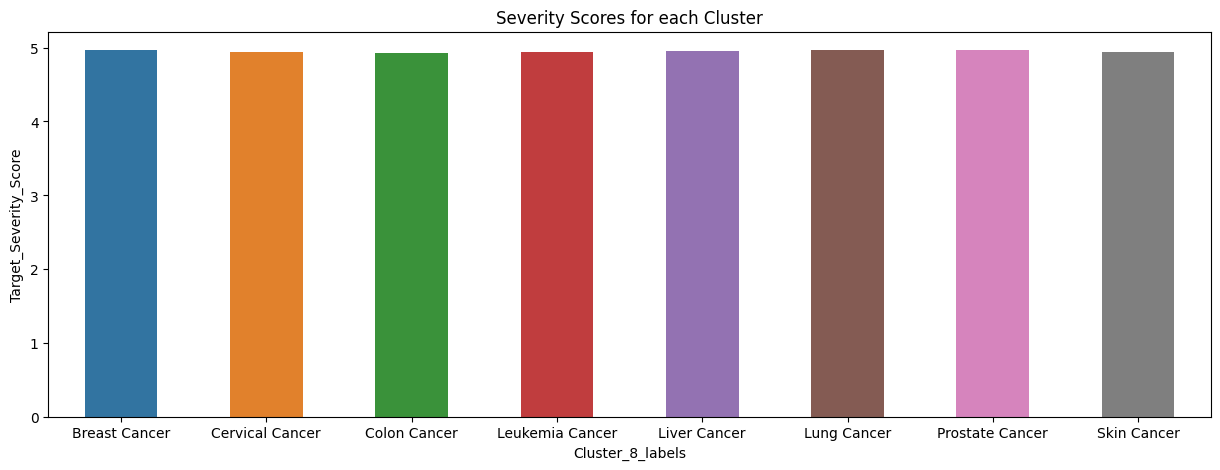

In [77]:
a=df.groupby("Cluster_8_labels").Target_Severity_Score.mean().reset_index()
plt.figure(figsize=(15,5))
sns.barplot(data=a, x="Cluster_8_labels",y="Target_Severity_Score",hue="Cluster_8_labels",width=0.5)
plt.title("Severity Scores for each Cluster")

**Observation**
* Each cancer type patients have very similar severity scores.
* Each cancer type patients also have equal distribution in cancer stages. That is for each cancer stage, each cluster have a similar amount of patients.